American Resturants

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px

# Apply the default theme
sns.set_theme()

In [ ]:
ls

sample_data/


In [ ]:
import zipfile

# Replace 'your_zip_file.zip' with the name of your zip file
zip_file_path = 'archive.zip'

# Replace 'extracted_folder' with the name of the folder where you want to extract the files
extract_to_folder = 'data'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified folder
    zip_ref.extractall(extract_to_folder)

print("Archive has been extracted successfully.")

Archive has been extracted successfully.


In [347]:
data=pd.read_csv(r'data/North America Restaurants.csv')

In [348]:
data.describe()

,weighted_rating_value,aggregated_rating_count
count,1500.000000,1500.000000
mean,3.724533,85.500667
std,0.989005,277.071136
min,1.000000,1.000000
25%,2.900000,5.000000
50%,4.100000,25.000000
75%,4.600000,68.000000
max,5.000000,4211.000000


In [ ]:
data.head(2)

,name,city,state,zipcode,country,cuisines,pickup_enabled,delivery_enabled,weighted_rating_value,aggregated_rating_count
0,Burger King,Manitowoc,WI,54220,US,"American, Burger, Burgers, Family Meals, Fast ...",True,True,2.4,42
1,Petro-Canada,Airdrie,AB,T4A,CA,"Ben & Jerry's, Café/Thé, Coffee/Tea, Convenien...",True,True,4.1,1


In [ ]:
type(data['name'])

pandas.core.series.Series

In [ ]:
data['name'].shape

(1500,)

In [ ]:
#see the columns with NA values
data.isnull().sum()

name                       0
city                       0
state                      0
zipcode                    0
country                    0
cuisines                   1
pickup_enabled             0
delivery_enabled           0
weighted_rating_value      0
aggregated_rating_count    0
rating                     0
dtype: int64

In [ ]:
def check(x):
  if x <= 0:
    return np.NaN
  else :
    return x

In [ ]:
len(data[data['weighted_rating_value'].apply(lambda x :check(x)).isna()])

0

In [363]:
#check for all dataset and removes rows with null values
def check_columns_na(x):
    if x.isna().sum()>=1:
      print(x.name)
      data.drop(index=(x.name),axis=0,inplace=True)

    return
data.apply(lambda x:check_columns_na(x),axis=1)

633


0       None
1       None
2       None
3       None
4       None
        ... 
1495    None
1496    None
1497    None
1498    None
1499    None
Length: 1500, dtype: object

In [366]:
#all restaurant are rated
data.isna().sum()

name                       0
city                       0
state                      0
zipcode                    0
country                    0
cuisines                   0
pickup_enabled             0
delivery_enabled           0
weighted_rating_value      0
aggregated_rating_count    0
dtype: int64

check null columns

In [ ]:
[col for col in data.columns if data[col].nunique() <= 1]

['delivery_enabled']

In [ ]:
data['name'].value_counts()

Petro-Canada             208
Starbucks                 78
A&W                       33
McDonald's                29
Montana's                 29
                        ... 
Oak & Stone                1
Jamaican Jerk Kitchen      1
Kin Dee Seattle            1
Chevron Extramile          1
Denny's                    1
Name: name, Length: 597, dtype: int64

In [ ]:
[col for col in data.columns if data[col].nunique()<=1]

['delivery_enabled']

In [ ]:
#delivery_enabled column has just one value so basically it doesnt impact the dataset we must remove it

check the number of Nan values in each column

In [ ]:
data[['name','delivery_enabled']] #the inner brackets are a ist of columns and the outer are the rows selected from the

,name,delivery_enabled
0,Burger King,True
1,Petro-Canada,True
2,Boba Bae,True
3,1001 Nights Shawarma,True
4,Chirpyhut Fried Chicken (JlgJ),True
...,...,...
1495,Grandma's Soul Food,True
1496,Jimbob's Pizza,True
1497,Petro-Canada,True
1498,Denny's,True


In [ ]:
# i want to know rate of Mcdonalds in us and ca





1.   How much restaurant that have the deivery enabled ?
2.   Which restaurant has the pick up lines enabled?
1. The pourcentage of us restaurant that has the delivery enabled?






*1-How much restaurant that have the deivery enabled ?*

In [ ]:
len(list(data[data['delivery_enabled']==True].index))

1500

2-Which restaurant has the pick up lines enabled?

In [ ]:
len(list(data[data['pickup_enabled']==True].index))

1159

3-The pourcentage of us restaurant that has the picked line enabled?

In [ ]:
data[(data['country']=='US') & (data['pickup_enabled']==True)].head(2)

,name,city,state,zipcode,country,cuisines,pickup_enabled,delivery_enabled,weighted_rating_value,aggregated_rating_count,rating
0,Burger King,Manitowoc,WI,54220,US,"American, Burger, Burgers, Family Meals, Fast ...",True,True,2.4,42,2.0
2,Boba Bae,Ashwaubenon,WI,54304,US,"American, Asian Food, Bubble Tea, Coffee & Tea...",True,True,4.0,88,4.0


In [ ]:
total=data['name'].count()

In [ ]:
nb_us_pickedline=len(data[(data['country']=='US') & (data['pickup_enabled']==True)].index)

In [ ]:
pr_us_pickedline=(nb_us_pickedline/total)*100
print(f'pourcentage od us restaurant that picked line is {pr_us_pickedline}%')

pourcentage od us restaurant that picked line is 37.266666666666666%


Choose the best features and see how features align with each other,
1-who's the restaurant that has the highest rating (country,cuisine)

In [ ]:
data['weighted_rating_value']

0       2.4
1       4.1
2       4.0
3       4.6
4       4.6
       ... 
1495    2.0
1496    4.1
1497    4.5
1498    3.4
1499    4.8
Name: weighted_rating_value, Length: 1500, dtype: float64

i write a function that modify the rating of restaurant
"value.fvalue " if fvalue<5 =>rating =value+1 else
rating =value  and add this clumn to the dataset so i will have rating from (0 to 5) and i will create the label of dataset

In [ ]:
def frt(x):
  return np.round(x['weighted_rating_value'])

In [ ]:
label_column=data.apply(frt,axis=1)

In [ ]:
label_column

0       2.0
1       4.0
2       4.0
3       5.0
4       5.0
       ... 
1495    2.0
1496    4.0
1497    4.0
1498    3.0
1499    5.0
Length: 1500, dtype: float64

In [ ]:
data.insert(10,'rating',label_column)

In [ ]:
data.head(2)

,name,city,state,zipcode,country,cuisines,pickup_enabled,delivery_enabled,weighted_rating_value,aggregated_rating_count,rating
0,Burger King,Manitowoc,WI,54220,US,"American, Burger, Burgers, Family Meals, Fast ...",True,True,2.4,42,2.0
1,Petro-Canada,Airdrie,AB,T4A,CA,"Ben & Jerry's, Café/Thé, Coffee/Tea, Convenien...",True,True,4.1,1,4.0


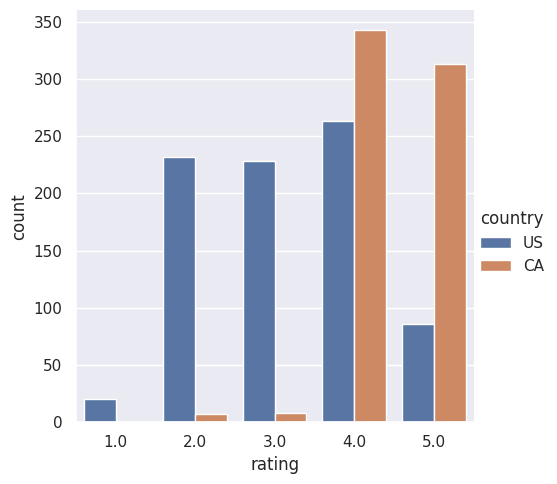

In [ ]:
sns.catplot(data=data, x="rating", kind="count",hue='country')

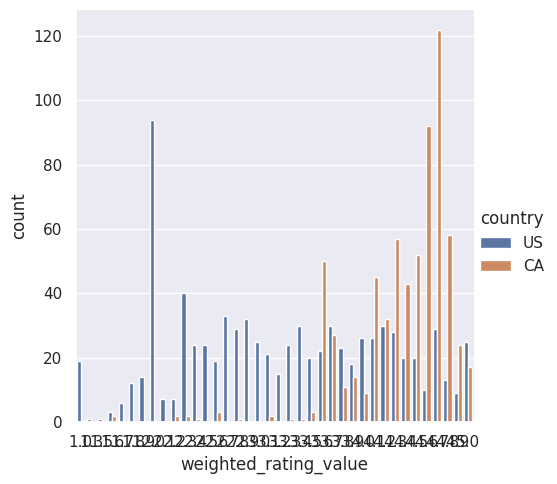

In [ ]:
sns.catplot(data=data, x="weighted_rating_value", kind="count",hue='country')

In [ ]:
#we could see the picked line feature if he impact the rating

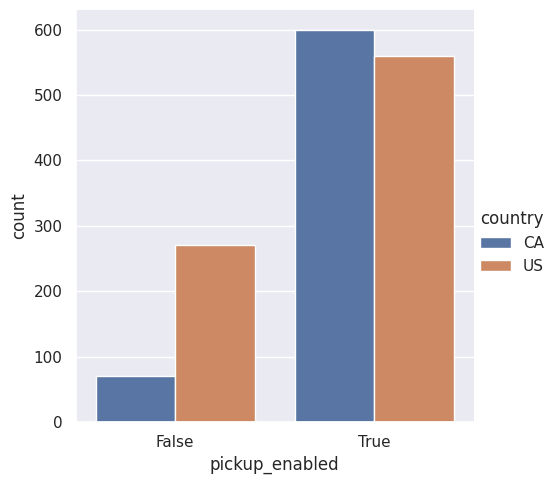

In [ ]:
sns.catplot(data,x='pickup_enabled',kind='count',hue='country')
#we can see the CA country has a larger picked line than us
#i want to see in each country the picked line count and

calcuate the number of True and false picked line in each country

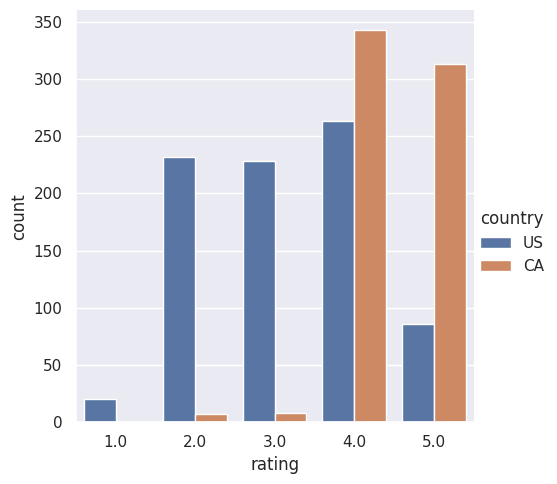

In [ ]:
sns.catplot(fdr,x='rating',kind='count',hue='country')

In [ ]:
#data[(data['country']=='US') & (data['pickup_enabled']==True)]

In [ ]:
def count_rating_country(x):
 #print(x[x['country']=='CA'])
 return x

In [ ]:
fty=data.groupby(['country'],group_keys=True)[['pickup_enabled','rating']].apply(count_rating_country)

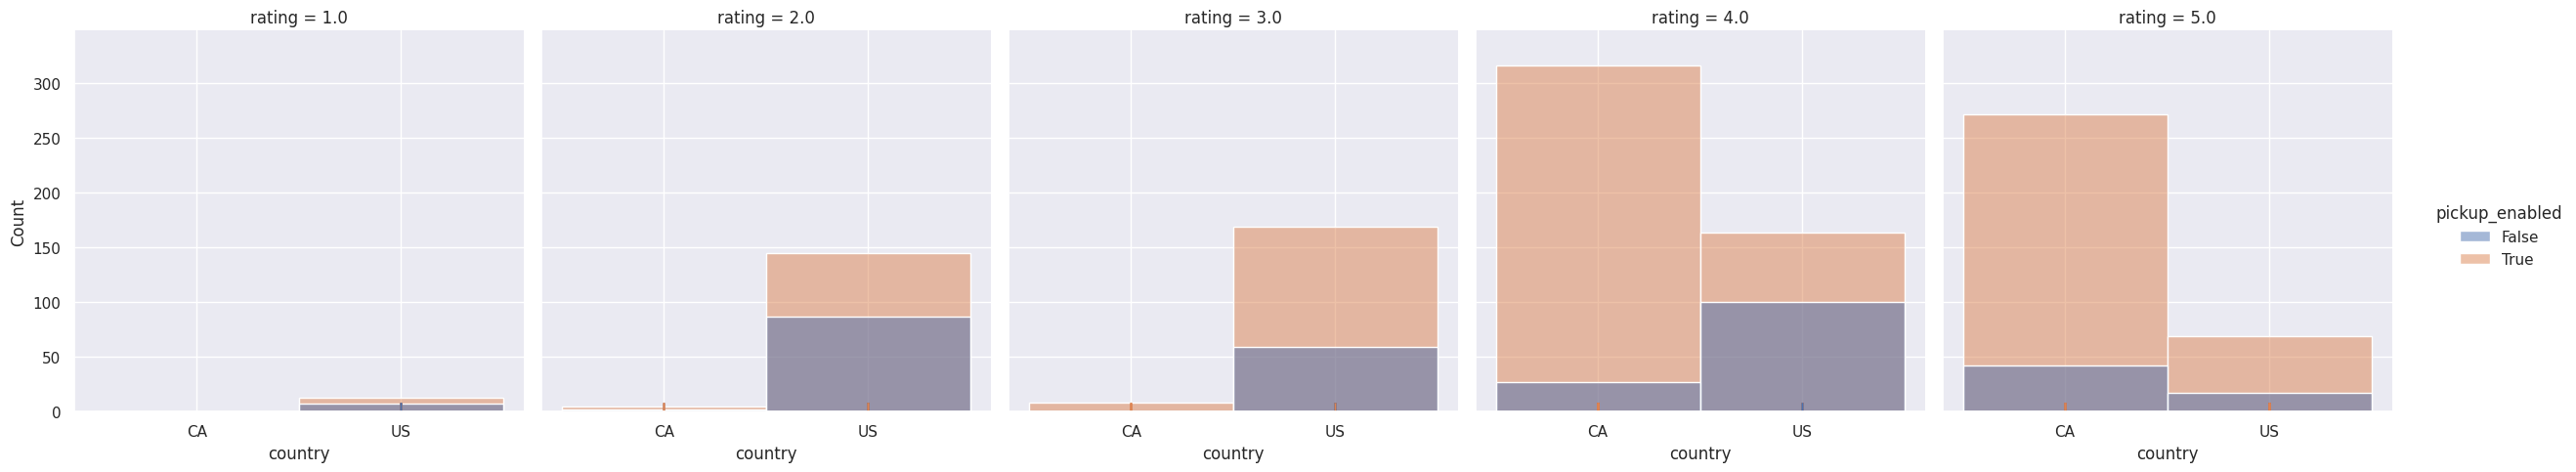

In [ ]:
sns.displot(data=fty,  x="country", col="rating", hue="pickup_enabled", rug=True)

In [ ]:
data.groupby(['pickup_enabled','country'],group_keys=True)[['weighted_rating_value']].mean()

weighted_rating_value
pickup_enabled country                       
False          CA                    4.457746
               US                    3.155556
True           CA                    4.348667
               US                    3.236315

we see that the country feature does impact the rating , we observe that all the >4 rating restaurant has the picked_enabled is true , hence this feature is also a good feature

we sill analyze the name feature and the cuisine feature

In [387]:
type(data['name'].value_counts())

pandas.core.series.Series

In [390]:
data['name'].value_counts().index

Index(['Petro-Canada', 'Starbucks', 'A&W', 'McDonald's', 'Montana's',
       'Empire Chef', 'Montana's Bbq & Bar', 'A&w', 'Subway',
       'Super Mega Dilla',
       ...
       'Maple Street Biscuit Company', 'French Fry Or Die',
       'Dairyland Brew Pub', 'The Salad Snob- Fremont',
       'Smoothie King 2090 W. Pleasant Grove Rd.', 'Oak & Stone',
       'Jamaican Jerk Kitchen', 'Kin Dee Seattle', 'Chevron Extramile',
       'Denny's'],
      dtype='object', length=596)

In [ ]:
#country ,picked_enabled is a good feature